### Technique 2: Random Sample Imputation

(This method is similar to Mean/Median/Mode). 

But, it takes a random observation from the dataset and replace the missing or nan value

#### Q) When it should be used?
Answer) It assumes that the data is 'missing completely at random (MCAR)'

In [3]:
import pandas as pd

In [5]:
df = pd.read_csv('titanic.csv', usecols = ['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [8]:
# Check how many values are null
df.isnull().sum() 

Survived      0
Age         177
Fare          0
dtype: int64

In [12]:
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [15]:
df['Age'].isnull().sum() # We will paste this in below code .sample(_______)

177

In [13]:
df['Age'].dropna().sample() # .sample() picks up NaN values

764    16.0
Name: Age, dtype: float64

In [16]:
## This code replaces all missing values -->> .sample(_______)

df['Age'].dropna().sample(df['Age'].isnull().sum()) 

236    44.00
525    40.50
498    25.00
15     55.00
117    29.00
585    18.00
139    24.00
695    52.00
9      14.00
10      4.00
796    49.00
182     9.00
823    27.00
194    44.00
439    31.00
831     0.83
163    17.00
493    71.00
681    27.00
798    30.00
267    25.00
285    33.00
217    42.00
476    34.00
390    36.00
591    52.00
289    22.00
50      7.00
865    42.00
503    37.00
       ...  
41     27.00
875    15.00
357    38.00
302    19.00
618     4.00
137    37.00
323    22.00
296    23.50
755     0.67
129    45.00
693    25.00
332    38.00
89     24.00
440    45.00
777     5.00
657    32.00
829    62.00
283    19.00
549     8.00
870    26.00
112    22.00
408    21.00
103    33.00
339    45.00
379    19.00
39     14.00
603    44.00
360    40.00
571    53.00
445     4.00
Name: Age, Length: 177, dtype: float64

We added random sample in above step - Check the length -->> 177 null values are replaced

In [18]:
df[df['Age'].isnull()].index

Int64Index([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,
            ...
            832, 837, 839, 846, 849, 859, 863, 868, 878, 888],
           dtype='int64', length=177)

In [23]:
## Let us replace NaN values with Random Sample Value and compare it with mean/median/mode

def impute_nan(df, variable, median):
    df[variable+"_median"]=df[variable].fillna(median) # Replace Variable with 'Age' feature
    df[variable+"_random"]=df[variable]
    
    ## This will help me pick up the random sample to fill the na
    random_sample = df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    
    ## pandas needs to have same index in order to merge the dataset
    random_sample.index=df[df[variable].isnull()].index # I have captured the index above for the null values 
    df.loc[df[variable].isnull(),variable+'_random']=random_sample # Wherever it is null just replace it with random value

In [24]:
median=df.Age.median()
median

28.0

In [25]:
impute_nan(df, "Age", median)

In [26]:
df.head()

,Survived,Age,Fare,Age_median,Age_random
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0


In [27]:
import matplotlib.pyplot as plt
%matplotlib inline

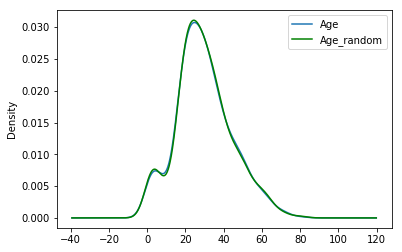

In [33]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot('kde', ax=ax)
df.Age_random.plot(kind='kde', ax=ax, color='green')
lines, labels=ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In the above chart, the graphs are almost same. In 'FE01 - Mean, Median & Mode' --> there was distortion

THIS IS SOOO AMAZING!!

#### Initial Chart

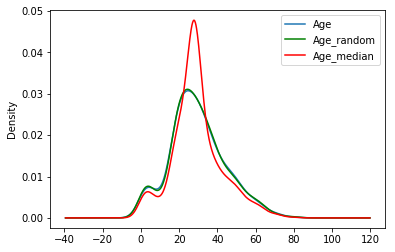

In [34]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot('kde', ax=ax)
df.Age_random.plot(kind='kde', ax=ax, color='green')
df.Age_median.plot(kind='kde', ax=ax, color='red')
lines, labels=ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

#### Advantages
    1. Easy to implement
    2. Less distortion in variance

#### Disadvantages
    1. In every situation randomness will not work